In [37]:
import pandas  as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv('/content/pima.csv')
df

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
df.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
767,1,93,70,31,0,30.4,0.315,23,0
493,4,125,70,18,122,28.9,1.144,45,1
303,5,115,98,0,0,52.9,0.209,28,1
596,0,67,76,0,0,45.3,0.194,46,0
169,3,111,90,12,78,28.4,0.495,29,0


In [40]:
df.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

In [41]:
X=df.drop('class',axis=1)

In [42]:
Y=df['class']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
X_scaled=scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2)

In [48]:
X_train.shape

(614, 8)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model=RandomForestClassifier(n_estimators=100)

In [51]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
score=accuracy_score(Y_test,y_pred)

In [55]:
score

0.7207792207792207

In [56]:
importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

In [63]:
importances_df

,feature,importance
1,plasma_concentration,0.251239
5,bmi,0.162947
7,age,0.137982
6,diabetes_pedigree,0.121227
2,diastolic_blood_pressure,0.087643
4,serum_insulin,0.084762
0,time_pregnant_no,0.080139
3,triceps_skinfold_thickness,0.074061


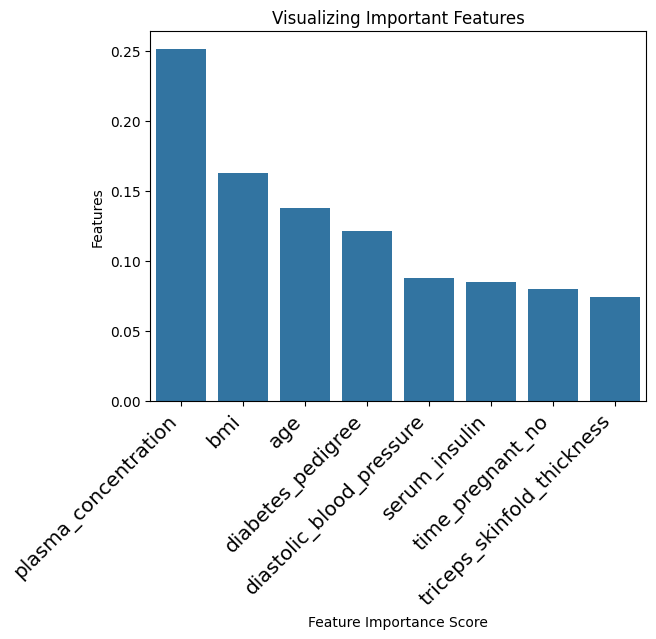

In [64]:
sn.barplot(x=importances_df.feature, y=importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [65]:
df2=[[2,160,78,32,0,26,0.543,34]]

In [66]:
model.predict(df2)

array([1])

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [68]:
classifier=Sequential()


In [69]:
classifier.add(Dense(units=8,activation='tanh'))

In [70]:
classifier.add(Dense(units=4,activation='tanh'))

In [71]:
classifier.add(Dense(units=2,activation='tanh'))

In [72]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [73]:

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [75]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.2,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
50/50 [==============================] - 2s 10ms/step - loss: 0.6622 - accuracy: 0.6253 - val_loss: 0.6601 - val_accuracy: 0.6179
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.6864 - val_loss: 0.6347 - val_accuracy: 0.6098
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7149 - val_loss: 0.6174 - val_accuracy: 0.6260
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5618 - accuracy: 0.7393 - val_loss: 0.6038 - val_accuracy: 0.6585
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.7515 - val_loss: 0.5922 - val_accuracy: 0.6748
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5245 - accuracy: 0.7576 - val_loss: 0.5828 - val_accuracy: 0.6992
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5100 - accuracy: 0.7739 - val_loss: 0.5770 - val_accuracy: 0.6911
Epoch 8/100


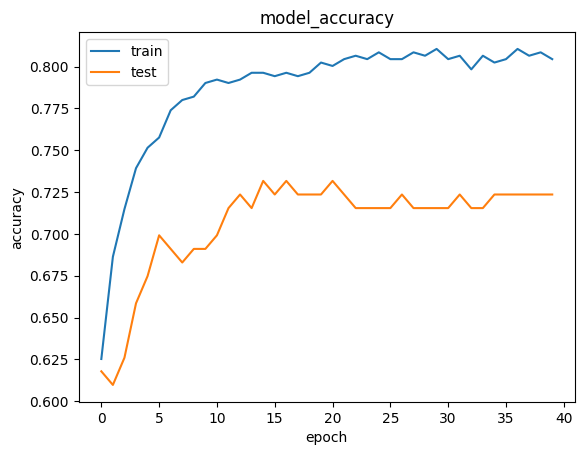

In [76]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

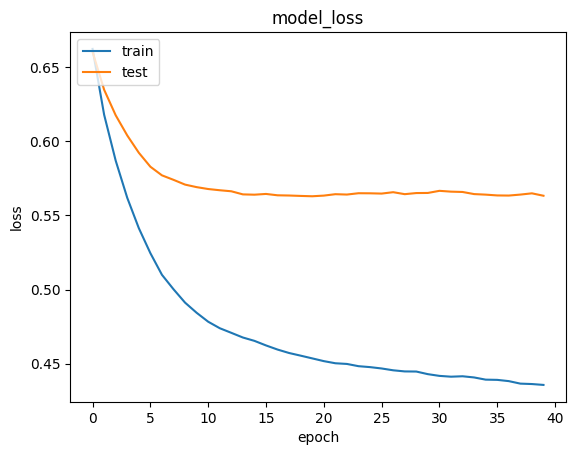

In [77]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [78]:
y_pred1=classifier.predict(X_test)
y_pred1=(y_pred >=0.5)

5/5 [==============================] - 0s 4ms/step


In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred1)
print(cm)

[[83 17]
 [26 28]]


In [81]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y_pred1)
print(acc)

0.7207792207792207


In [82]:
classifier.get_weights()

[array([[-0.27440605,  0.5738763 , -0.41222423,  0.17587766, -0.2865485 ,
          0.3895372 , -0.16672967, -0.20459397],
        [-0.04691568,  0.25002667, -0.8791181 ,  0.08744749,  0.44878942,
         -0.78550243, -0.6810839 , -0.01459723],
        [-0.5813887 , -0.34078053,  0.11916292,  0.5786184 ,  0.44783124,
          0.01734165, -0.0926319 ,  0.3142525 ],
        [-0.56239456, -0.45798245,  0.44672197,  0.29088426,  0.52444726,
         -0.17430001,  0.17330924, -0.32855   ],
        [ 0.14275132,  0.37652162, -0.2711667 ,  0.46412513,  0.03928273,
          0.24178444, -0.03511836,  0.57896453],
        [-0.63178223,  0.54326856, -0.6062138 , -0.01069465,  0.504868  ,
         -0.2576517 ,  0.2729071 , -0.0459397 ],
        [-0.62419724,  0.11358855, -0.39344582,  0.60645336,  0.27654907,
         -0.41008064,  0.5098228 ,  0.1605276 ],
        [ 0.16482928, -0.16682586,  0.3820657 ,  0.06261615,  0.23728041,
         -0.53325343,  0.04515054,  0.31820965]], dtype=float32),